In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn import tree
from typing import Tuple, List

In [2]:
GEYSER = 'geyser.csv'
CHIPS = 'chips.csv'
DRAW_ITERATIONS = [1, 2, 3, 5, 8, 13, 21, 34, 55]
BIG_NUMBER = 1e10
ESP = 1e-8

In [3]:

def class_to_int_label(clazz) -> int:
    if clazz == 'P':
        return 1
    return -1

def read_dataset(filename: str) -> Tuple[List[List[float]], List[int]]:
    dataset = pd.read_csv(filename)
    return dataset[['x', 'y']].values.tolist(), \
                [class_to_int_label(clazz) for clazz in dataset['class']]


geyser_X, geyser_y = read_dataset(GEYSER)
geyser_dataset = list(zip(geyser_X, geyser_y))
random.shuffle(geyser_dataset)
geyser_X, geyser_y = list(zip(*geyser_dataset))
geyser_X, geyser_y = list(geyser_X), list(geyser_y)

chips_X, chips_y = read_dataset(CHIPS)
chips_dataset = list(zip(chips_X, chips_y))
random.shuffle(chips_dataset)
chips_X, chips_y = zip(*chips_dataset)
chips_X, chips_y = list(chips_X), list(chips_y)


In [7]:
def N(model, w, X, y):
    l = len(X)
    predictions = []
    for x in X:
        predictions.append(model.predict([x]))
    return sum([w[i] for i in range(l) if predictions[i] != y[i]])

class AdaBoost(object):
    
    def __init__(self):
        pass

    def fit(self, X, y, base_algorithm_num=80, visualize=True):
        self.b = []
        self.alpha = []
        self.w = []
        self.accuracies = []
        
        l = len(X)
        for i in range(l):
            self.w.append(1. / l)

        for t in range(base_algorithm_num):
            # train current model
            model = tree.DecisionTreeClassifier(max_depth=3)
            inds = random.choices(range(l), k=l, weights=self.w)
            X_cur = []
            y_cur = []
            for i in inds:
                X_cur.append(X[i])
                y_cur.append(y[i])
            model.fit(X_cur, y_cur)
            
            N_cur = N(model, self.w, X, y)
            alpha_cur = 0
            if N_cur == 0:
                alpha_cur = 0.5 * math.log((1 - N_cur + 1./l) / (N_cur + 1./l))
            else:
                alpha_cur = 0.5 * math.log((1 - N_cur) / N_cur)
            self.b.append(model)
            self.alpha.append(alpha_cur)
            
            # update weights
            for i in range(l):
                self.w[i] = self.w[i] * math.exp(-alpha_cur * y[i] * model.predict([X[i]]))
            
            # normalize weights
            w_sum = sum(self.w)
            for i in range(l):
                self.w[i] /= w_sum
            
            if (t + 1) in DRAW_ITERATIONS and visualize:
                self.draw(X, y, (t + 1))
                
            # count accuracy
            accuracy = 0
            for i in range(l):
                pred = self.predict(X[i])
                if pred == y[i]:
                    accuracy += 1
            accuracy /= l
            self.accuracies.append(accuracy)

    def predict(self, x):
        prediction = 0
        for i in range(len(self.b)):
            prediction += self.b[i].predict([x])[0] * self.alpha[i]

        if prediction > 0:
            return 1
        else:
            return -1
    
    
    def model_accuracies(self):
        return self.accuracies
        
                
    def draw(self, X, y, iteration):
        print(f'Iteration #{iteration}')
        l = len(X)
        ll = l if l < 200 else int(l / 1.5)
        x_Axis = np.linspace(min([X[i][0] for i in range(l)]), max([X[i][0] for i in range(l)]), ll)
        y_Axis = np.linspace(min([X[i][1] for i in range(l)]), max([X[i][1] for i in range(l)]), ll)
        
        background_X = [[x, y] 
                        for x, y in zip(np.repeat(x_Axis, ll), np.tile(y_Axis, ll))]
        background_Y = []
        for x in background_X:
            background_Y.append(self.predict(x))
        ##############
        
        X_y = list(zip(X, y))
        back_X_y = list(zip(background_X, background_Y))
       
        plt.scatter([x[0] for x, y in back_X_y if y < 0], [x[1] for x, y in back_X_y if y < 0],
                    marker='.', color='coral', alpha=0.5)
        plt.scatter([x[0] for x, y in back_X_y if y > 0], [x[1] for x, y in back_X_y if y > 0],
                    marker='.', color='yellowgreen', alpha=0.5)
        plt.scatter([x[0] for x, y in X_y if y < 0], [x[1] for x, y in X_y if y < 0], marker='_', color='red')
        plt.scatter([x[0] for x, y in X_y if y > 0], [x[1] for x, y in X_y if y > 0], marker='+', color='green')
        plt.show()

In [8]:
# CHIPS_TRAIN_SIZE = 70
# GEYSER_TRAIN_SIZE = 130

Iteration #1


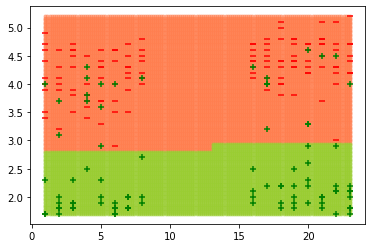

Iteration #2


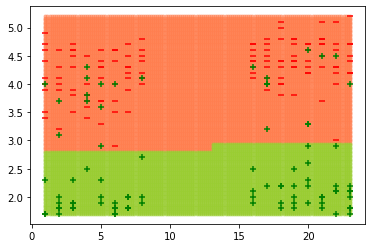

Iteration #3


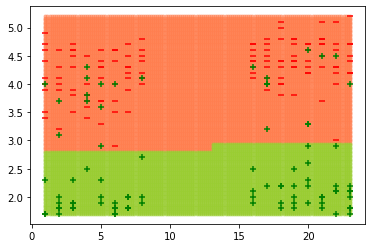

Iteration #5


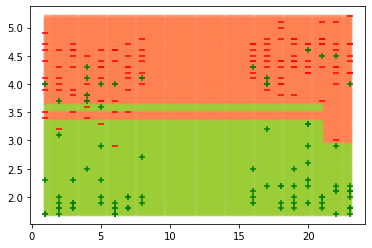

Iteration #8


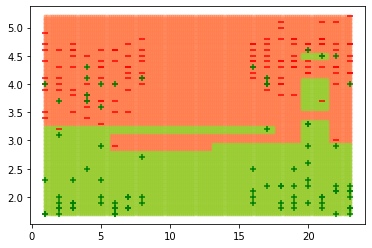

Iteration #13


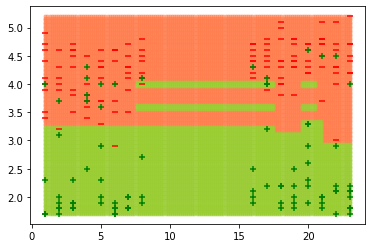

Iteration #21


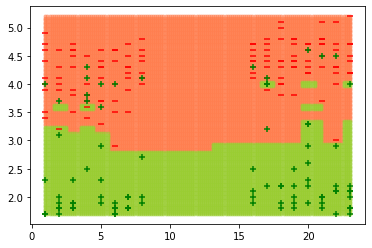

Iteration #34


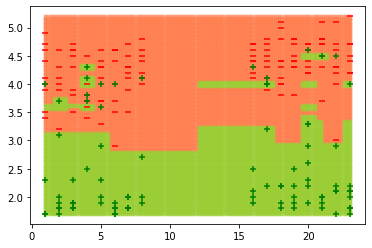

Iteration #55


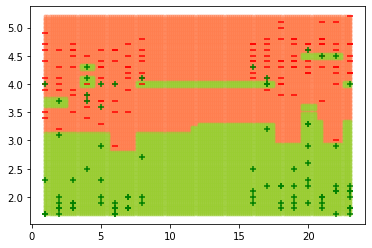

In [9]:
adaBoostGeyser = AdaBoost()
adaBoostGeyser.fit(geyser_X, geyser_y)

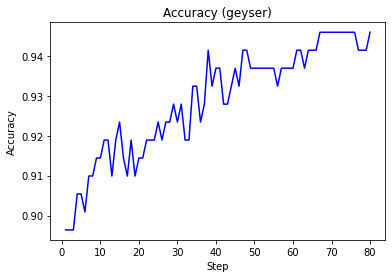

In [12]:
accuracies = adaBoostGeyser.model_accuracies()
plt.plot(list(range(1, 81)), accuracies, 'b')
plt.title('Accuracy (geyser)')
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.show()

Iteration #1


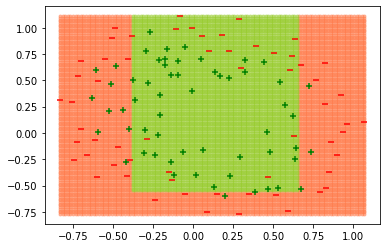

Iteration #2


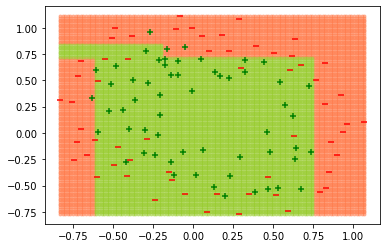

Iteration #3


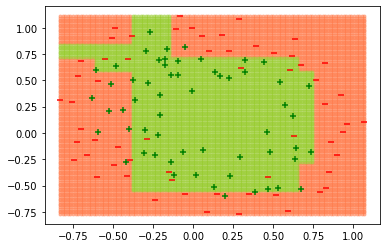

Iteration #5


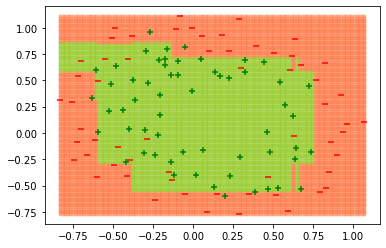

Iteration #8


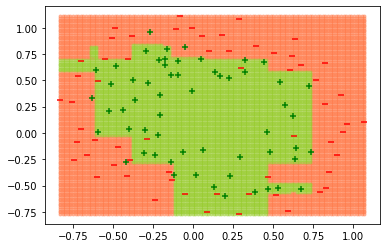

Iteration #13


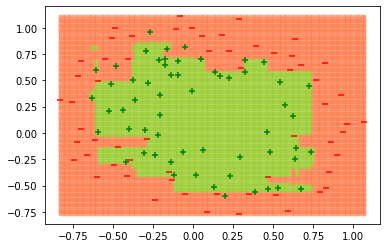

Iteration #21


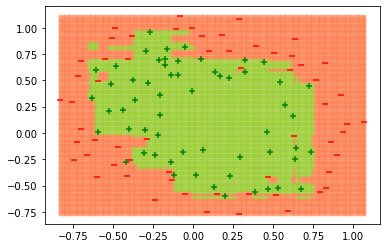

Iteration #34


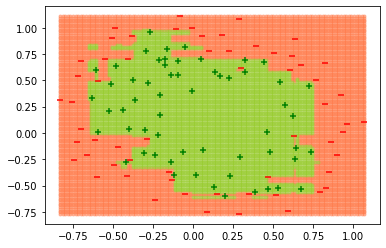

Iteration #55


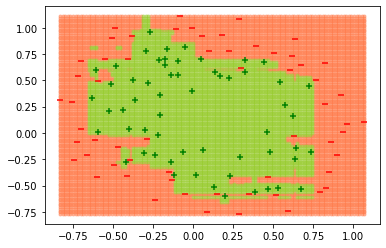

In [13]:
adaBoostChips = AdaBoost()
adaBoostChips.fit(chips_X, chips_y)

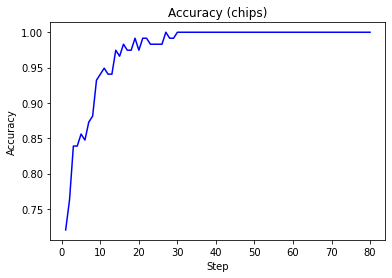

In [14]:
accuracies = adaBoostChips.model_accuracies()
plt.plot(list(range(1, 81)), accuracies, 'b')
plt.title('Accuracy (chips)')
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.show()